In [1]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits import mplot3d
from scipy import stats
%matplotlib inline
df = pd.read_csv('./data_mod_1.csv')

#### &#167;0 Exploring State Zip WA 98103
The 148 samples in WA 98103 is a comfortable amount of work with, to verify our machine learning algorithm results with hand calculations. The algorithm can be extended to the rest of the 4550 samples in the original dataframe, that comprises the entire Seattle region.

<img src="./98103.png">

In [118]:
df_4 = df.loc[ (df['statezip'] == 'WA 98103'), ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'price'] ]

X_ = df_4.sqft_living  # sqft is the most telling of price
X = X_.to_numpy()  # we want to convert from series to a numpy array
ones = np.ones(len(X))  # adding a ones column in front
X_with_ones_col = np.column_stack((ones, X))  # Data Preprocessing

y_ = df_4.price  # target
y = y_.to_numpy()

#### &#167;1.0 Applying Machine Learning Models

<IPython.core.display.Javascript object>


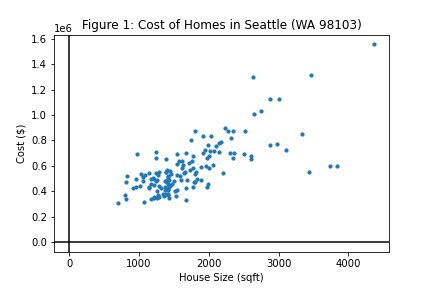

Text(0, 0.5, 'Cost ($)')

In [805]:
fig4, ax4 = plt.subplots()

ax4.scatter(X, y, s=10)  # plot looks fine
ax4.axhline(0, color='black')
ax4.axvline(0, color='black')
ax4.set_title("Figure 1: Cost of Homes in Seattle (WA 98103)")
ax4.set_xlabel("House Size (sqft)")
ax4.set_ylabel("Cost ($)")

#### &#167;1.1 Linear Regression with the sklearn Library

In [21]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [108]:
model = l_reg.fit(X_with_ones_col, y)

In [109]:
l_reg.coef_

array([  0.        , 229.49521863])

In [80]:
l_reg.intercept_

184435.24482113082

From the sklearn, the weights for w<sub>0</sub> and w<sub>1</sub> are 184435.2 and 229.5 respectively.

#### &#167;1.2 An Analytic Approach

The advantages of an analytic approach:
<ul>
<li>no need for gradient descent</li>
<li>no need to perform thousands of iterations</li>
<li>no need for learning rate guesswork</li>
<li>no need for feature scaling</li>
<li>no need to ensure vectorization</li>
</ul>

In [86]:
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [556]:
normal_equation(X_with_ones_col, y)

array([184435.24482113,    229.49521863])

From our analytic approach, the weights for w<sub>0</sub> and w<sub>1</sub> are 184435.2 and 229.5 respectively. These values are exactly the same as the values from sklearn.

#### &#167;1.3 Developing a Cost Function

Sometimes, we have to use gradient descent when the normal equation cannot be applied, like for example in logistic regression.

#### &#167;1.3.1  Scaling Down

Note standard feature scaling techniques are applicable ( subtracting the mean and divide by the standard deviation from each value) but I've opted not to because I want to get a scaled down value by tens (ie 184435 -> 1.84) of what we got from sklearn and from the analytic solution, so that all three approaches are comparable.

In [112]:
X_scaled = X/1000
X_scaled_with_ones_col = np.column_stack((np.ones(len(X_scaled)), X_scaled))
y_scaled = y/100000

If we use the normal equation, we get the following weights

In [116]:
normal_equation(X_scaled_with_ones_col, y_scaled)

array([1.84435245, 2.29495219])


Note that, the weight values change from 

w<sub>0</sub>=184435.2 and w<sub>1</sub>= 229.5
to
<b>
w<sub>0</sub>=1.84 and w<sub>1</sub>= 2.29
   </b>

#### &#167;1.4 Plotting the Cost Function

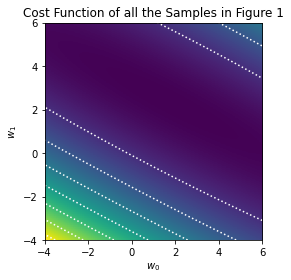

In [119]:
def plot(g): # The cost function, tests all pairs of weights in a specified range.
    g2 = g*g
    steps = np.linspace(-4, 6, g)
    w0, w1 = np.meshgrid(steps, steps)
    w0_ = w0.ravel()
    w1_ = w1.ravel()
    w = np.column_stack([w0_, w1_])
    
    def calculateCostArray(X, y, i):
        return computeCost(X, y, w[i])
    
    def computeCost(X, y, w):
        t = X @ w - y
        t_squared = t * t   # vectorized. element wise squaring
        cost = 1/(2*len(X)) * sum(t_squared)
        return cost
    
    costs = np.zeros(g2)
    for i in range(g2):
        costs[i] = calculateCostArray(X_scaled_with_ones_col, y_scaled, i)
    
    costs = costs.reshape(g, g, -1)
    costs = costs.squeeze()
    
    fig3, ax3 = plt.subplots()

    ax3.imshow(costs, origin='lower', extent=(w0.min(), w0.max(), w1.min(), w1.max()))
    ax3.set_title("Cost Function of all the Samples in Figure 1")
    ax3.set_xlabel('$w_0$')
    ax3.set_ylabel('$w_1$')
    ax3.contour(w0, w1, costs, colors='white', linestyles=':')
    
plot(100)

We have a cost function representation as a contour and a surface plot. Now we need to apply gradient descent to our cost function and hopefully we get w<sub>0</sub>=1.84 and w<sub>1</sub>= 2.29

#### &#167;1.5  Gradient Descent

Our initial guess is w<sub>0</sub>=0 and w<sub>1</sub>= 0. After gradient descent, we expect w<sub>0</sub>=1.84 and w<sub>1</sub>=2.29

In [89]:
def gradient_descent(X, y, learn_rate=0.00004, num_steps= 10000):
    w = np.array([0, 0]) # so instead of guessing x, we're guessing w
    for i in range(num_steps):
        grad = (X.T @ X) @ w - X.T @ y  # so.. this is a very useful equation
        w = w - learn_rate*grad
    return w

In [819]:
w_from_gradient_descent = gradient_descent(X_scaled_with_ones_col, y_scaled)
w_from_gradient_descent

array([1.84270283, 2.29581986])

With gradient descent, we come up with values w<sub>0</sub>=1.84 and w<sub>1</sub>= 2.29, the same answer as our above approaches and the answer we were expecting.

#### &#167;1.6 Gradient Descent on our Cost Function

We can plot the weights on our contour plot we've created in &#167;1.3.1

<IPython.core.display.Javascript object>


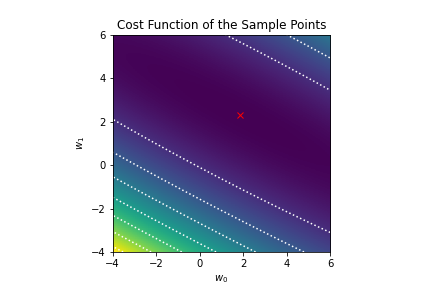

In [820]:
plot(100)
plt.plot(*w_from_gradient_descent, 'xr')